In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [2]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(iris_df)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [4]:
iris_df["cluster"] = kmeans.labels_
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  target  
0        1       0  
1        1       0  
2        1       0  
3        1       0  
4        1       0

In [6]:
iris_df["target"] = iris.target
iris_result = iris_df.groupby(["target", "cluster"])["sepal length (cm)"].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal length (cm), dtype: int64


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_df)

iris_df["pca_x"] = pca_transformed[:, 0]
iris_df["pca_y"] = pca_transformed[:, 1]
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  target     pca_x     pca_y  
0        1       0 -2.840721  0.492707  
1        1       0 -2.869133  0.291660  
2        1       0 -3.031246  0.326418  
3        1       0 -2.897623  0.246555  
4        1       0 -2.881928  0.503342

Text(0.5, 1.0, '3 clusters Visualiztion by 2 PCA Components')

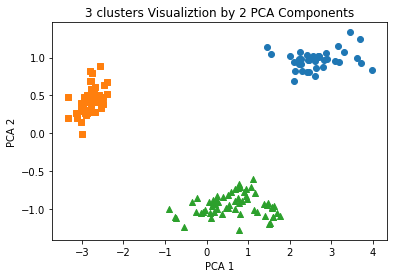

In [8]:
#군집 값이 0, 1, 2인 경우 마다 별도의 인덱스로 추출
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=iris_df.loc[marker0_ind, "pca_x"], y=iris_df.loc[marker0_ind, "pca_y"], marker="o")
plt.scatter(x=iris_df.loc[marker1_ind, "pca_x"], y=iris_df.loc[marker1_ind, "pca_y"], marker="s")
plt.scatter(x=iris_df.loc[marker2_ind, "pca_x"], y=iris_df.loc[marker2_ind, "pca_y"], marker="^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 clusters Visualiztion by 2 PCA Components")

